# Probability and Statistics

In this notebook we cover the basic concepts in probability and statistics that you will need for MA124. We leave it to other modules, e.g. Probability A and B, to cover these things properly. What we need is sufficiently intuitive that we can focus on the requisite Python tools.

---

We will need collections of random numbers. These collections are referred to as samples. We will need these samples to be of one of two types
- those with numbers equally likely to be anywhere in some interval $[a,b]$. This is the uniform distribution.
- those with numbers distributed according to the normal (Gaussian) distribution.

---

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

## Uniform distribution

We have already seen the first case in the first notebook. The NumPy statement

```
X = np.random.uniform(a, b, N)
```

will generate an array `X` with `N` random numbers each equally likely to be anywhere in `[a,b]`. For example

In [ ]:
N = 1000
a, b = 0, 1
X = np.random.uniform(a, b, N)

We think of `X` as a sample of `N` randomly chosen numbers. The ordering of these number within the array `X` has no particular meaning. 

A standard way to visualise a random sample is to produce a [histogram](https://en.wikipedia.org/wiki/Histogram). For many reasons it is important to known how to plot histograms in Python, and it is also easy. In the cell below we again generate a random sample, but this time we plot a histogram for the sample. This histogram has 11 bins. The height of each bar is the number of values in `X` that fall inside the corresponding bin.

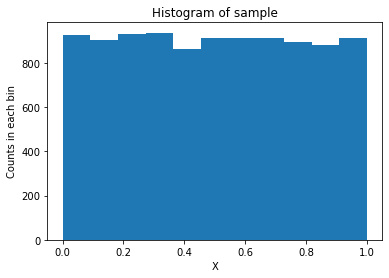

In [20]:
N = 10000
a, b = 0, 1
X = np.random.uniform(a, b, N)

# Plot histogram of the sample
plt.hist(X, bins=11)

plt.xlabel("X")
plt.ylabel("Counts in each bin")
plt.title("Histogram of sample")
plt.show()

**Exercise:** Try increasing `N` to at least 10000 and higher if you wish. You will see that as you increase `N` you get more nearly the same number in each bin. Play with the number of bins. Now change `a` or `b`, or both. 

---

For reasonably large `N` the number of counts in each bin is approximately the same. 
This is because the points in the sample are equally likely to be anywhere between `a` and `b`. The values in `X` are said to be drawn (chosen) at random from the **uniform distribution on `[a, b]`**. 
The idea is intuitive enough without a precise definition.

---

You will notice something very inconvenient about the histogram. Look at the vertical axis of your current plot. Now decrease `N` by a factor of 10. You will see that numbers have changed by about a factor of 10. This is because the sum of the counts in all bins is sample size `N`.

To emphasis this point the cell below plots histograms for two sample sizes in different colours 

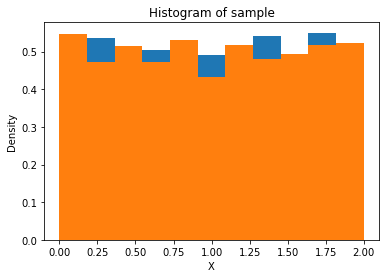

In [39]:
# Generate and plot histograms for two sample sizes 
a, b = 0, 2

X = np.random.uniform(a, b, 4000)
plt.hist(X, bins=11, density=True)

X = np.random.uniform(a, b, 2000)
plt.hist(X, bins=11, density=True)

plt.xlabel("X")
plt.ylabel("Density")
plt.title("Histogram of sample")
plt.show()

**Exercise:** You are going to fix this issue. In both calls to `plt.hist` above, add the Keyword argument `density=True`. Re-run the cell. Both histograms are now normalised so that the coloured area (the "area under the curve") is one. Both histograms should be about the same, with height approximately 1. 
If you want, change one of the sample sizes. Whatever you change it to, the histogram will be essentially the same. (One should change the `plt.ylabel("Counts")` to `plt.ylabel("Density")`, since the vertical axis is no longer counts, but you do not need to do this.)

**Exercise:** Change `b` to `b=2` and rerun the cell. You should see the height decrease to approximately 1/2 so that the area is again 1. Choose whatever values you want for `a` and `b`. As long as $a<b$, the height will be approximately $1/(b-a)$.



*The Keyword `density` refers to the fact that in this form the histogram corresponds to a probability density and therefore the total area (total probability) is required to be exactly one. This is already more information than we need and we leave the explanation of probability density functions to other modules.*


---

### Uniform distribution of points in higher dimensions

We sometimes want random points in two or higher dimensions. We already saw this in the first notebook. If we want a random sampling of points (uniformly) in a square box $[x_{min}, x_{max}] \times [y_{min}, y_{max}]$ we just sample each of the Cartesian coordinates separately

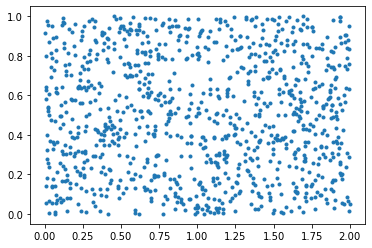

In [31]:
# Generate a random sample of N points in [x_min, x_max]x[y_min, y_max]
x_min, x_max = 0, 2
y_min, y_max = 0, 1

N = 1000
x = np.random.uniform(x_min, x_max, N)
y = np.random.uniform(y_min, y_max, N)

plt.plot(x, y, '.')
plt.show()


Generating a set of random points inside a cuboid would be similar. 

**Note:** We use $[a,b]$ for intervals simple intervals, but in higher dimensions we will often to use $[x_{min}, x_{max}] \times [y_{min}, y_{max}]$.

---
## The normal distribution

Whether or not you have formally covered the normal distribution in your studies, you are surely aware of it, e.g. [the human hibernation project](https://www.youtube.com/watch?v=fNg1XOKrREk&ab_channel=MissPoste%2aargw27). It is also referred to as the Gaussian distribution.

The cell below illustrates the normal distribution. The statement
```
X = np.random.randn(N)
```
is used to generate a sample of `N` normally distributed random numbers. 

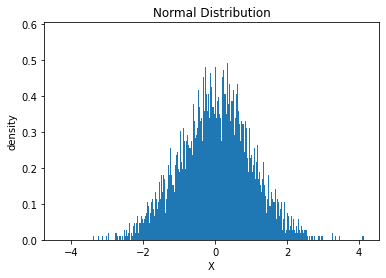

In [42]:
# Generate N normally distributed random numbers and plot histogram as density
N = 50000
X = np.random.randn(N)

# Plot histogram of the sample using 31 bins
plt.hist(X, bins=4000, density=True)

plt.xlabel("X")
plt.ylabel("density")
plt.title("Normal Distribution")
plt.show()

You will recognise the "bell shaped curve". The sampled values are more likely to be near zero. 
Approximately 68% of the sample points will be between $\pm 1$, about 95% will be between $\pm 2$, [etc](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule). 
Any of the sample points could in principle have a very large positive or negative value, but it is very unlikely. There are reasons why random numbers are often distributed this way, most importantly due to the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).

**Exercise:** Try increasing `N` to at least 10000 and higher if you wish. You will see that as you increase `N` you can also increase the number of bins to get an increasingly smooth shape. Play with these. 

---

We can compare the histogram plotted as a density with the true normal (Gaussian) distribution. The formula is not so complicated and you could code it yourself, but we will use the SciPy library function to generate it. We need to import `norm` from SciPy using

```
from scipy.stats import norm
```

Usually we import libraries at the top of our notebooks. Since we need this only here we have exceptionally waited until the function is needed

In [44]:
from scipy.stats import norm

We can now use 
```
y = norm.pdf(x)
```
to generate a graph corresponding to the true normal distribution, much as we use `y = np.sin(x)` to generate a graph corresponding to $y = \sin(x)$. 

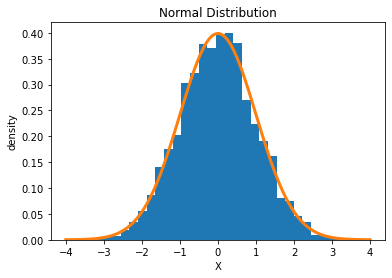

In [45]:
# Generate N normally distributed random numbers and plot density
N = 4000
X = np.random.randn(N)

plt.hist(X, bins=31, density=True)

# plot normal distribution 
x = np.linspace(-4,4,101)
y = norm.pdf(x)
plt.plot(x, y, lw=3)

plt.xlabel("X")
plt.ylabel("density")
plt.title("Normal Distribution")
plt.show()

The normal distribution shown is referred to as the standard normal distribution. It is centred on `X=0` and it has width 1 (standard deviation 1; see below). The standard normal distribution is the only normal distribution that we will need. Others can be obtained by shifting and scaling the standard normal distribution.


---
## Three basic statistics

Given a sample of random numbers `X`, three basic statistical quantities one typically wants are:
- mean, obtained with `np.mean(X)`
- standard deviation, obtained with `np.std(X)`
- variance, obtained with `np.var(X)`


The mean is the same as the average and is typically denoted with a bar, e.g. $\bar X$. You could easily write your own for-loop to add up the values in `X` and divide by the number, but it is preferable to call `np.mean(X)`. 

The standard deviation tells you how much on average the samples differ from the mean. It measures the "width" of the distribution. The variance is the square of the standard deviation. We do not expect to use standard deviation and variance outside of this notebook, so if you are not familiar with these, do not worry about it. It is important that you know that they are easily computed with NumPy and so you may find them useful in the future. We will demonstrate these below with some hopefully helpful plots.


---

**Exercise:** Predict the output from the cell below. (You cannot expect to get the means exactly right because they are random, but you can predict what they will be if `N` is large.) Then run it:

In [46]:
N = 40000
X1 = np.random.uniform(0, 1, N)
mean1 = np.mean(X1)
print("mean1 is", mean1)

X2 = np.random.uniform(2, 4 ,N)
mean2 = np.mean(X2)
print("mean2 is", mean2)

mean1 is 0.5007452081492314
mean2 is 2.9994157892611892


**Exercise:** Rerun the cell a few times for fixed `N`. You see that each time the mean of the random sample (what is called the sample mean) changes, but it is pretty close to what you think the mean of a sample of random points in an interval should be. Increase the size of `N` and rerun the cell. 

Finally, we compute the mean and standard deviation for the standard normal distribution to show that the mean is zero (approximately for a sample) and the standard deviation is one. 

In [ ]:
N = 4000
X = np.random.randn(N)
mean = np.mean(X)
std = np.std(X)

# print the mean and std rounded to 4 decimal places
print("mean is", round(mean,4), "and the standard deviation is", round(std,4))

---

## Summary

For the purposes of our Monte Carlo studies, you need to be able to do the following:

- Generate uniform random samples of points inside intervals $[x_{min}, x_{max}]$, rectangles $[x_{min}, x_{max}]\times [y_{min}, y_{max}]$, and cuboids $[x_{min}, x_{max}]\times [y_{min}, y_{max}]\times [z_{min}, z_{max}]$. 
- Generate random samples from the normal distribution in one dimension, e.g `X = np.random.randn(N)`.
- Compute the mean of a random sample.

---
# Exercises


---


1. Insert a code cell below. Generate a sample of `N` uniformly distributed points with coordinates $(x,y,z)$ inside a unit cube $[0,1]\times [0,1]\times [0,1] = [0,1]^3$. You can choose the value of `N` as you wish. Find the mean (average) position of the points $(\bar x, \bar y, \bar z)$. Is the result approximately what you expect?

---

The next two questions are optional, but well worth doing.

2. To generate a uniform distribution of points inside a circle, you might tempted to do the following:

```
N = 1000
r = np.random.uniform(0,1,N)
phi = np.random.uniform(0,2*np.pi,N)
x = r*np.cos(phi)
y = r*np.sin(phi)
```

Create a code cell below and try this. Plot the points $(x,y)$. You will observe that they don't look so uniform. The `phi` part of the calculation is correct. Try setting `r` to be the square root of points from the uniform distribution. You should see that the problem is fixed. (To compensate for the fact that areas grow as $r^2$, you need to take a square root of the uniformly sampled points. You can try to figure this out or not.)

3. The NumPy function `np.random.normal` generates samples from the normal distribution with specified mean $\mu$ and standard deviation $\sigma$. The code cell below generates and plots the density for three examples. Change the value of sigma in the second case to 0.1 and rerun. The result might look like a well-known [tower](https://en.wikipedia.org/wiki/Burj_Khalifa). (Recall that the area of all the histograms is the same.) Add print statements to print the mean, standard deviation and variance for each of the three cases and verify that the results are consistent with the specified value of `mu` and `sigma`. 

---

In [ ]:
# Generate N normally distributed random numbers and plot density
N = 10000

mu, sigma = 0, 1
X = np.random.normal(mu, sigma, N)
plt.hist(X, bins=31, density=True)

mu, sigma = 4, 1
X = np.random.normal(mu, sigma, N)
plt.hist(X, bins=31, density=True)

mu, sigma = -3, 2
X = np.random.normal(mu, sigma, N)
plt.hist(X, bins=31, density=True)

plt.xlabel("X")
plt.ylabel("density")
plt.title("Normal Distribution")
plt.show()

---
# Answers 
---

Expand cells to see answers.

Q1 answer

In [ ]:
# Generate uniformly distributed random numbers

N = 10000
x_min, x_max = 0, 1
y_min, y_max = 0, 1
z_min, z_max = 0, 1

x = np.random.uniform(x_min, x_max, N)
y = np.random.uniform(y_min, y_max, N)
z = np.random.uniform(z_min, z_max, N)

x_mean = np.mean(x)
y_mean = np.mean(y)
z_mean = np.mean(z)

print("the mean position is", round(x_mean,4), round(y_mean,4), round(z_mean,4))

Q2 answer

In [ ]:
# Generates and plots uniform distribution of points inside unit circle.
# The example is very compact, but one could use something like:
# tmp = np.random.uniform(0,1,N)
# r = np.sqrt(tmp)
# which would not be so bad.

N = 1000
r = np.sqrt(np.random.uniform(0,1,N))
phi = np.random.uniform(0,2*np.pi,N)
x = r*np.cos(phi)
y = r*np.sin(phi)

plt.plot(x, y, '.')
plt.axis("square")
plt.show()